In [1]:
# import modules
import pandas as pd
import mysql.connector
import numpy as np

In [75]:
#initialize query and load dataframe
con = mysql.connector.connect(user='hbs-student', password='super-secure-password?',
                              host='hbs-ds-060120.c1doesqrid0e.us-east-1.rds.amazonaws.com',
                              database='movies')
cursor = con.cursor()

# # Pull IMBD data into df
mov_df = pd.read_sql_query('''SELECT * FROM movies.rt_movie_info 
                                
                                ;''', con)
old_df = mov_df

Data Wrangling Tasks:

1) rt_movie_info contains box_office and genres, but no title. It needs to be combined with rt_imdb_link on rtid to get title
2) genres in rt_movie_info are delimited by |, we will include any movies containing the genre as part of the category

In [45]:
mov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1560 non-null   object
 2   rating        1560 non-null   object
 3   genre         1560 non-null   object
 4   director      1560 non-null   object
 5   writer        1560 non-null   object
 6   theater_date  1560 non-null   object
 7   dvd_date      1560 non-null   object
 8   currency      1560 non-null   object
 9   box_office    1560 non-null   object
 10  runtime       1560 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [47]:
mov_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",,,104 minutes,None
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",,,116 minutes,None
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",,,128 minutes,None
4,7,,NR,Drama|Romance,Rodney Bennett,Giles Cooper,,,,,200 minutes,None


In [71]:
mov_df.rating.unique()

array(['R', 'NR', 'PG', 'PG-13', '', 'G', 'NC17'], dtype=object)

In [73]:
mov_df = old_df

In [76]:
#clean up box_office columns as they are all in strings

mov_df['box_office'] = mov_df['box_office'].str.replace(',', '')
mov_df['box_office'] = pd.to_numeric(mov_df['box_office'])
mov_df['box_office'].unique()

mov_df['runtime'] = mov_df['runtime'].str.replace('minutes', '')
mov_df['runtime'] = pd.to_numeric(mov_df['runtime'])

mov_df['rating'] = mov_df['rating'].astype('category')

In [69]:
mov_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",,NaN,104.0,None
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108.0,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",,NaN,116.0,None
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",,NaN,128.0,None
4,7,,NR,Drama|Romance,Rodney Bennett,Giles Cooper,,,,NaN,200.0,None


In [96]:
# Remove NaN values from box office
mov_df = mov_df.dropna(subset = ['box_office'])
mov_df.shape

(340, 12)

In [85]:
# Obtain a list of genre categories --> this is not used in the end

genre_list = list(mov_df['genre'].unique())
# genre_list

dlim = '|'
ldat = genre_list
lspl = []
for i in ldat:
    lspl.append((i.split("|")))
    
genres_unique = set().union(*lspl)
print(genres_unique)

{'Animation', 'Musical and Performing Arts', 'Cult Movies', 'Sports and Fitness', 'Television', 'Action and Adventure', 'Kids and Family', 'Mystery and Suspense', 'Romance', 'Art House and International', 'Drama', 'Western', 'Documentary', 'Classics', 'Comedy', 'Faith and Spirituality', 'Special Interest', 'Horror', 'Science Fiction and Fantasy'}


In [93]:
# Split dataframes by genres of movies
for gen in genres_unique:
    label = str(gen)
#     print (label)
    gen = mov_df.filter(like=label, axis=0)
    gen.head()

In [127]:
# horror_mov = mov_df.filter(like='Horror', axis=0)
mov_df['horror_bool'] = mov_df.genre.str.contains("Horror")
horror_mov = mov_df.loc[mov_df['horror_bool'] == True]
horror_mov.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,horror_bool
48,61,Death once again shows he's determined to get ...,R,Action and Adventure|Drama|Horror|Mystery and ...,James Wong,James Wong|Glen Morgan,"Feb 10, 2006","Jul 25, 2006",$,54100000.0,93.0,New Line Cinema,True
106,136,"In CASE 39, family services social worker Emil...",R,Horror|Mystery and Suspense,Christian Alvart,Ray Wright,"Oct 1, 2010","Jan 4, 2011",$,13248477.0,109.0,Paramount Studios,True
130,165,The novel of the same name by author Tom Savag...,R,Horror|Mystery and Suspense,Jamie Blanks,,"Feb 2, 2001","Jul 24, 2001",$,19755422.0,96.0,Warner Bros. Pictures,True
165,218,A disturbing videotape appears to hold the pow...,PG-13,Drama|Horror|Mystery and Suspense|Romance,Gore Verbinski,Ehren Kruger,"Oct 18, 2002","Mar 4, 2003",$,128579698.0,115.0,DreamWorks SKG,True
189,250,BYZANTIUM is director Neil Jordan's (Interview...,R,Art House and International|Drama|Horror|Myste...,Neil Jordan,Moira Buffini,"Jun 28, 2013","Oct 29, 2013",$,84293.0,118.0,IFC Films,True


In [108]:
mov_df.genre.str.contains("Horror")

1       False
6       False
7       False
8       False
15      False
        ...  
1541    False
1542    False
1545     True
1546    False
1555     True
Name: genre, Length: 340, dtype: bool

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot space as inline for inline plots and qt for external plots
%matplotlib inline

In [193]:
director_box = horror_mov.groupby('director').mean()
director_df = director_box.sort_values(by=['box_office'], ascending=False)
director_df
# director_df = director_df.loc[0:10, ['director','box_office','runtime']]

,id,box_office,runtime,horror_bool
director,,,,
Gore Verbinski,218.0,128579698.0,115.00,True
Andrew Stanton|Mark Atkins,1424.0,73058679.0,118.00,True
James Wong,61.0,54100000.0,93.00,True
Christophe Gans,456.0,46982632.0,125.00,True
Steven Quale,1011.0,42500000.0,92.00,True
Jonathan Liebesman,1542.0,39418953.0,84.00,True
Andrzej Bartkowiak,973.0,28031250.0,104.00,True
Peter Webber,848.0,27503677.0,121.00,True
Guillermo del Toro,322.0,25957696.0,119.00,True


In [182]:
# clean the data to include only box office
horror_rating_box = horror_mov.loc[:,['rating','box_office']]
horror_rating_box.set_index('rating')


,box_office
rating,
R,54100000.0
R,13248477.0
R,19755422.0
PG-13,128579698.0
R,84293.0
R,12583510.0
R,25957696.0
R,46982632.0
PG-13,10500000.0


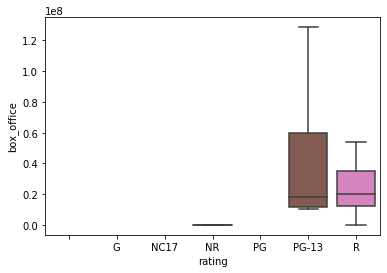

In [185]:
sns.boxplot(x = 'rating', y = 'box_office', data=horror_rating_box)